### Logistic Classifier for CIFAR-10

In [ ]:
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

import helpers
from Cifar10 import Cifar10

In [ ]:
# device configuration
# device = torch.device('mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu'))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

print(f'Using device {device}')

# consitency in training
torch.manual_seed(1234)
random.seed(1234)

Using device cuda


In [ ]:
# Load data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = Cifar10(train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = Cifar10(train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Hyperparameters for LogReg model:
- solver
- loss function
- epochs
- learning rate

Solvers: 
- Adam
- SGD

Loss functions:
- CrossEntropyLoss

Learning Rate:
- 0.1
- 0.001
- 0.0005


In [ ]:
# define Logistic Classifier

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.log_layer = nn.Sequential(
            nn.Linear(3 * 32 * 32, 10),
            nn.Sigmoid()
        )

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = self.log_layer(x)

        return x


## Models

In [94]:
# net = Net().to(device)

# Hyper Parameters
num_epochs = 3

# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

param_options = [
    (optim.SGD, {'lr':0.1, 'momentum':0.9}, 'SGD 0.1'),
    (optim.SGD, {'lr':0.001, 'momentum':0.9}, 'SGD 0.001'),
    (optim.SGD, {'lr':0.0005, 'momentum':0.9}, 'SGD 0.0005'),
    (optim.Adam, {'lr':0.1}, 'Adam 0.1'),
    (optim.Adam, {'lr':0.001}, 'Adam 0.001'),
    (optim.Adam, {'lr':0.0005}, 'Adam 0.0005')
]

metrics = []
for opt, kwargs, label in param_options:
    net = Net().to(device)
    # loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = opt(net.parameters(), **kwargs)
    loss_vals, tr_acc, te_acc  = helpers.train_model(net, trainloader, testloader, device, criterion, optimizer, num_epochs)

    metrics.append((loss_vals, tr_acc, te_acc, label))


starting training
[1,  2000] loss: 2.163 tr acc: 0.188 te acc: 0.192
[1,  4000] loss: 2.112 tr acc: 0.221 te acc: 0.227
[1,  6000] loss: 2.095 tr acc: 0.224 te acc: 0.220
[1,  8000] loss: 2.094 tr acc: 0.231 te acc: 0.231
[1, 10000] loss: 2.088 tr acc: 0.228 te acc: 0.232
[2,  2000] loss: 2.079 tr acc: 0.231 te acc: 0.236
[2,  4000] loss: 2.074 tr acc: 0.237 te acc: 0.241
[2,  6000] loss: 2.089 tr acc: 0.239 te acc: 0.242
[2,  8000] loss: 2.076 tr acc: 0.242 te acc: 0.241
[2, 10000] loss: 2.067 tr acc: 0.250 te acc: 0.252
[3,  2000] loss: 2.058 tr acc: 0.259 te acc: 0.261
[3,  4000] loss: 2.056 tr acc: 0.256 te acc: 0.256
[3,  6000] loss: 2.060 tr acc: 0.245 te acc: 0.243
[3,  8000] loss: 2.059 tr acc: 0.247 te acc: 0.247
[3, 10000] loss: 2.052 tr acc: 0.247 te acc: 0.249
Finished Training
starting training
[1,  2000] loss: 2.113 tr acc: 0.337 te acc: 0.341
[1,  4000] loss: 2.066 tr acc: 0.350 te acc: 0.349
[1,  6000] loss: 2.051 tr acc: 0.351 te acc: 0.350
[1,  8000] loss: 2.045 tr ac

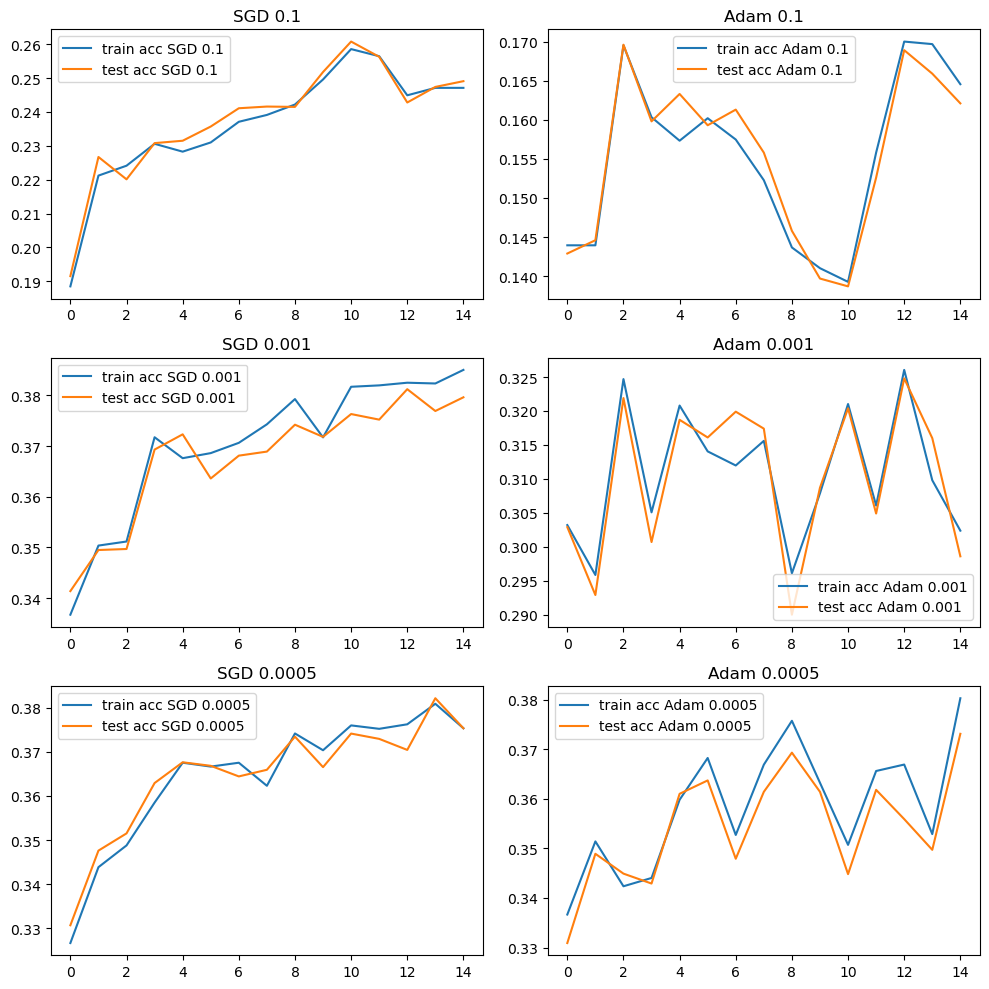

[([2.162815998017788,
   2.1117866955399514,
   2.095087876856327,
   2.0935767116546633,
   2.0877025393247606,
   2.0790431914925573,
   2.0735813541412353,
   2.088970127105713,
   2.076379668176174,
   2.0668461276888848,
   2.057996653020382,
   2.0555281428694725,
   2.0600065070390703,
   2.0586145225167276,
   2.052110237956047],
  [0.188475,
   0.2212,
   0.224125,
   0.2306,
   0.228275,
   0.231,
   0.2371,
   0.239125,
   0.2422,
   0.2496,
   0.258575,
   0.256475,
   0.244925,
   0.247125,
   0.247125],
  [0.1915,
   0.2267,
   0.2201,
   0.2308,
   0.2315,
   0.2357,
   0.2411,
   0.2416,
   0.2415,
   0.2518,
   0.2608,
   0.2563,
   0.2428,
   0.2474,
   0.2491],
  'SGD 0.1'),
 ([2.112893459498882,
   2.0660724477171897,
   2.051127879500389,
   2.0449674431085585,
   2.034693224489689,
   2.030568257808685,
   2.0257037217617033,
   2.0157895746827124,
   2.0203138793706894,
   2.0147875558137893,
   2.0050854330062866,
   2.0096429578065873,
   2.0035141171216964,
  

In [106]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))


for idx, (loss_vals, tr_acc, te_acc, label) in enumerate(metrics):
    # ax1, ax2 = axes[idx]
    ax = axes[idx%3][idx//3]
    # ax1.plot(range(len(loss_vals)), loss_vals, label=f'Loss {label}')
    ax.plot(range(len(loss_vals)), tr_acc, label=f'train acc {label}')
    ax.plot(range(len(loss_vals)), te_acc, label=f'test acc {label}')

    ax.set_title(label)
    ax.legend()
    # ax2.legend()

plt.tight_layout()
plt.show()

metrics